# Анализ рынка продажи игр

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Сейчас декабрь 2016 г., надо спланировать кампанию на 2017-й г.

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd # Подключаем библиотеку pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')

Выведем первые 20 строк из наших данных.

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем информацию о наших данных.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод:

В данных у нас 16715 строк и 11 столбцов.

### Подготовка данных

#### Изменение имён столбцов

Меняем названия в столбцах. Все буквы должны быть нижнего регистра.

In [5]:
def columns_lower(list_columns):
    new_list = []
    for value in list_columns:
        new_list.append(value.lower())
        
    return new_list

games.columns = columns_lower(games.columns)

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Вывод.

Поменяли названия всех столбцов чтобы было легче с ними взаимодействовать.

#### Изменение типов данных

Изменим типы в 2 столбцах: 

year_of_release - год выпуска игры, нынешний тип число с плавающей точкой, поменяем его на на целое, но сначала надо посмотреть есть ли пропущенные значения, поэтому разберёмся с этим столбцем в следующем пункте.

user_score - оценка пользователей, нынешний тип object. В дальнейшем нам надо будет узнавать среднее значение, медиану и др.
Поэтому поменяем тип на число с плавающей точкой.

In [7]:
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим такое значение как 'tbd', расшифровка 'ещё не определено', значит оценка ещё не поставлена, пока что заменим это значение nan, а позже при обработке данных исправим.

In [8]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = None
games['user_score'] = pd.to_numeric(games['user_score'], errors='ignore')

critic_score - оценка критиков, нынешний тип float, рассмотрим столбец.

In [9]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Видим, что у нас только целые значения, на основе этого мы делаем вывод, что оценки стоят в процентном виде. Поменяем тип с float на int. Однако у нас в данных есть пропуски, поэтому поменяем тип после их обработки.

Проверим результат наших действий.

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Вывод.

Поменяли тип данных в столбце user_score.

Нашли столбцы в которых нужно поменять тип данных, но сделаем это после обработки пропусков.

#### Обработка пропущенных значений

Рассмотрим количество пропущенных значений в каждом столбце.

In [11]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Рассмотрим как выглядят наши столбцы с пропусками.

In [12]:
games.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


name - качественная переменная, всего 2 пропуска, удалим их. Такое количество удаленных строк не сильно повлият на наши данные, а заполнить без ущерба для данных мы никак не можем. 

year_of_release = количественная переменная, всего 269 пропуска. Заполнить средним значением и медианной его не получится, поэтому лучше удалим эти строки.

genre - качественная переменная, всего 2 пропуска, удалим их. Такое количество удаленных строк не сильно повлият на наши данные, а заполнить без ущерба для данных мы никак не можем. 

critic_score - количественная переменная. Доля пропущенных значений составляет 51.3%, что является большим количеством, поэтому никак заполнить адекватно мы не сможем эти пропуски и удалить тоже нельзя. Поэтому оставим как есть.

user_score - количественная переменная. Доля пропущенных значений составляет 54.6%, что является большим количеством, поэтому никак заполнить адекватно мы не сможем эти пропуски и удалить тоже нельзя. Поэтому оставим как есть.

rating - качественная переменная, заполним данные пропуски значением RP, означающее, что игре всё ещё не выставили оценку.


In [13]:
delete_columns = ['name', 'year_of_release', 'genre']
games = games.dropna(subset=delete_columns) 

In [14]:
games['rating'] = games['rating'].fillna('RP')

In [15]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Вывод.

Изначально было 16715 строк, после обработки данных их стало 16444. 

Были удалены пропуски в столбцах: name, year_of_release, genre.

Были заполнены пропуски в столбце rating значением RP. RP - оценка ещё не выставлена.

Изменены типы данных с float на int в столбцах: year_of_release.

#### Дубликаты.

Проверим на явные дубликаты.

In [17]:
games.duplicated().sum()


0

Явных дубликатов нет.

Проверим на неявные дубликаты.

In [18]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:
games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Неявных дубликатов нет.

Вывод

Дубликатов нет.

#### Суммарные продажи во всех регионах

Создадим новый столбец с общей продажей.

In [20]:
games['general_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']

Выведем измененную таблицу.

In [21]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,30.38


Вывод.

Был создан новый столбец с общими продажами каждой игры.

### Исследовательский анализ данных

#### Количество игр выпускаемых в год

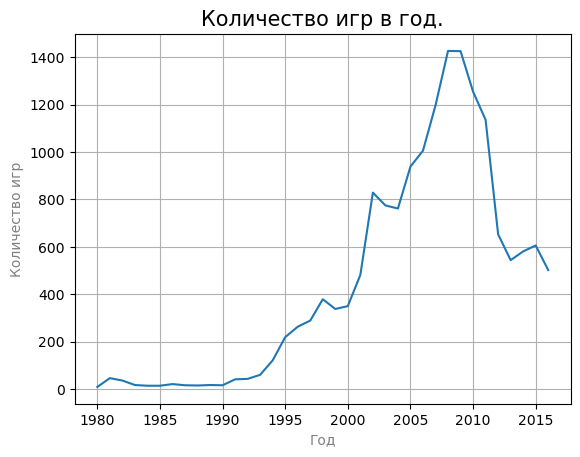

In [22]:

plt.title('Количество игр в год.', fontsize=15)
plt.grid(True)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество игр', color='gray')


plt.plot(pd.pivot_table(games,
                        index=['year_of_release'],
                        values=['name'],
                        aggfunc='count'
                        )
)

Вывод.

Мы видим рост выпускаемых игр с 1990 по 2007, пик был 2007-2009, позже их стали выпускать с каждым годом все меньше. Данные за все периоды не важны,рынок игр очень динамичен, чтобы предсказать ситуацию в следующем году надо использовать данные за последние 2-3 года.

#### Изменения продаж по платформам

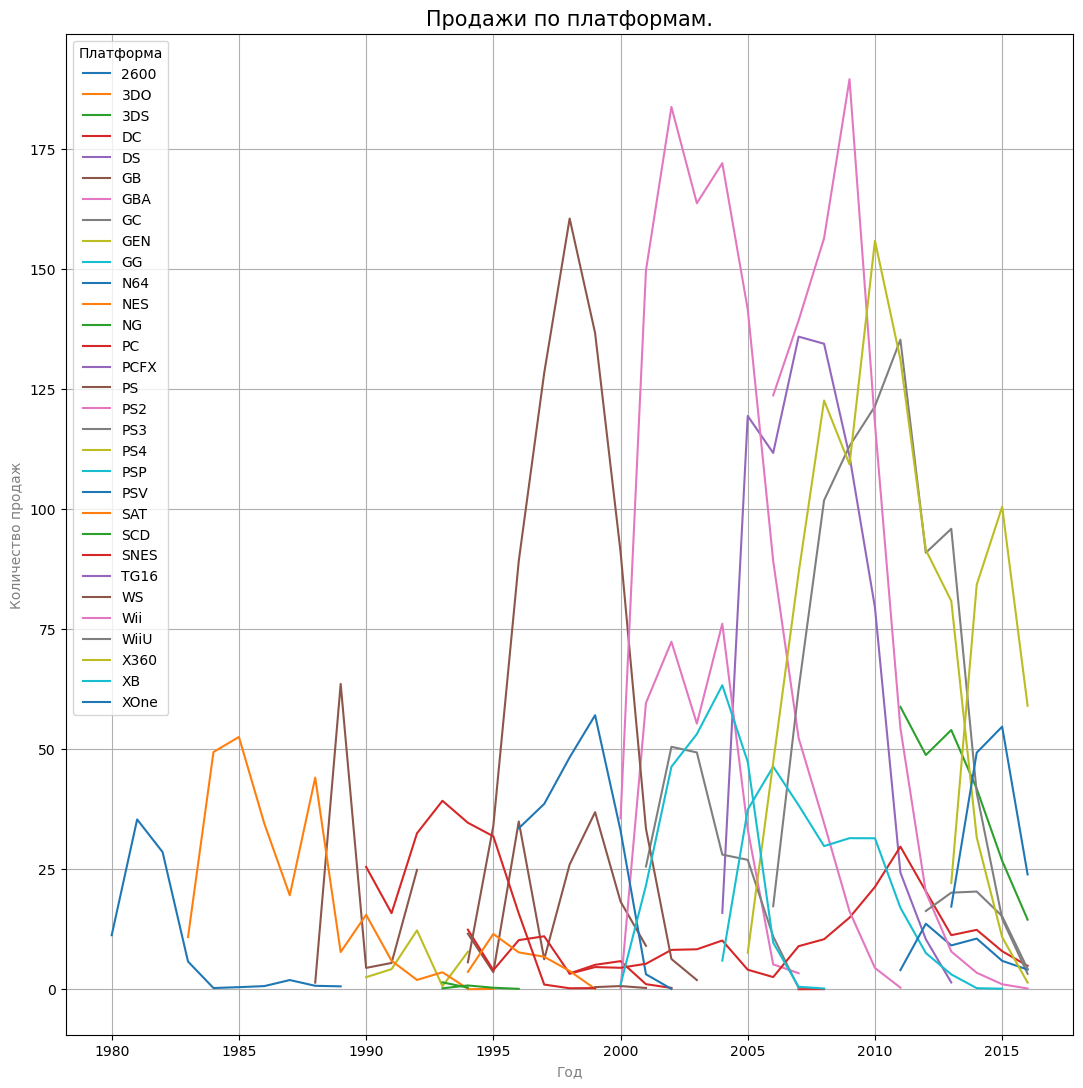

In [23]:
plt.figure(figsize=(13, 13))
plt.title('Продажи по платформам.', fontsize=15)
plt.grid(True)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество продаж', color='gray')

sales_by_platform = pd.pivot_table(games,
                                    index=['year_of_release'],
                                    columns=['platform'],
                                    values=['general_sales'],
                                    aggfunc='sum'
                                  )
plt.plot(sales_by_platform)
plt.legend(sales_by_platform.columns.get_level_values(level=1), loc=2, title='Платформа')



Начиная с 1997 года начали появляться платформы на которые приходятся большие продажи игр.

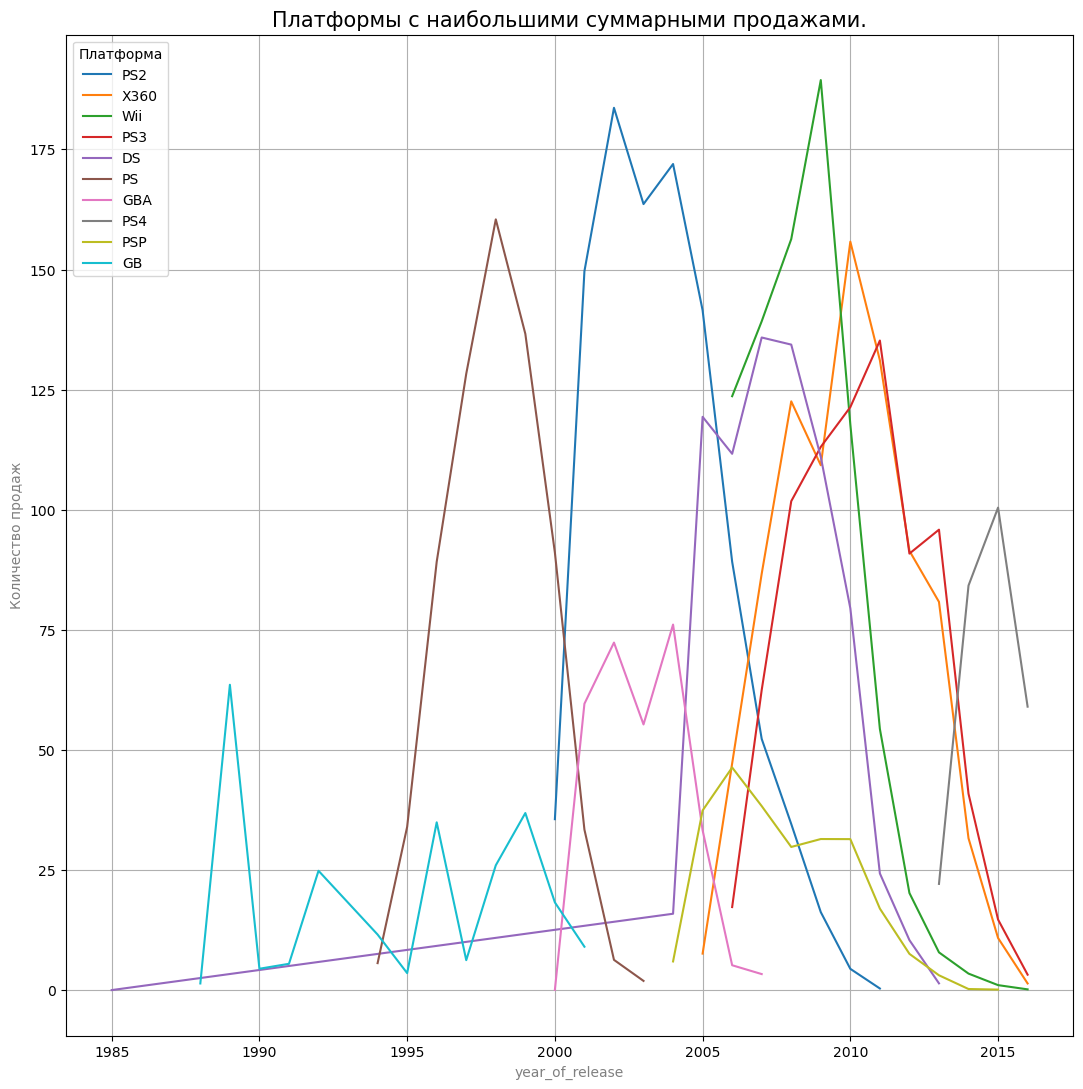

In [24]:
plt.figure(figsize=(13, 13))
plt.title('Платформы с наибольшими суммарными продажами.', fontsize=15)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество продаж', color='gray')

top_platforms = games.groupby('platform')['general_sales'].sum()
top_platforms = top_platforms.sort_values(ascending=False).head(10)
for platform in top_platforms.index:
    (games.loc[games['platform'] == platform]
     .groupby('year_of_release')['general_sales'].sum()
     .plot())

plt.legend(top_platforms.index, loc=2, title='Платформа')    
plt.grid(True)
plt.show()

Вывод:

Особой популярностью обладает линейка PS, на их новые платформы бывают очень большие продажи игр.

В среднем на пике платформы держатся 5 лет.

Примерно через 5 лет появляются новые платформы.

Платформа в среднем исчезает через 10 лет.

#### Актуальные платформы лидирующие по продажам, растущие или падающие.

Возьмём за актуальный период последние 3 года.

In [25]:
current_time = games.query('year_of_release >= 2014')

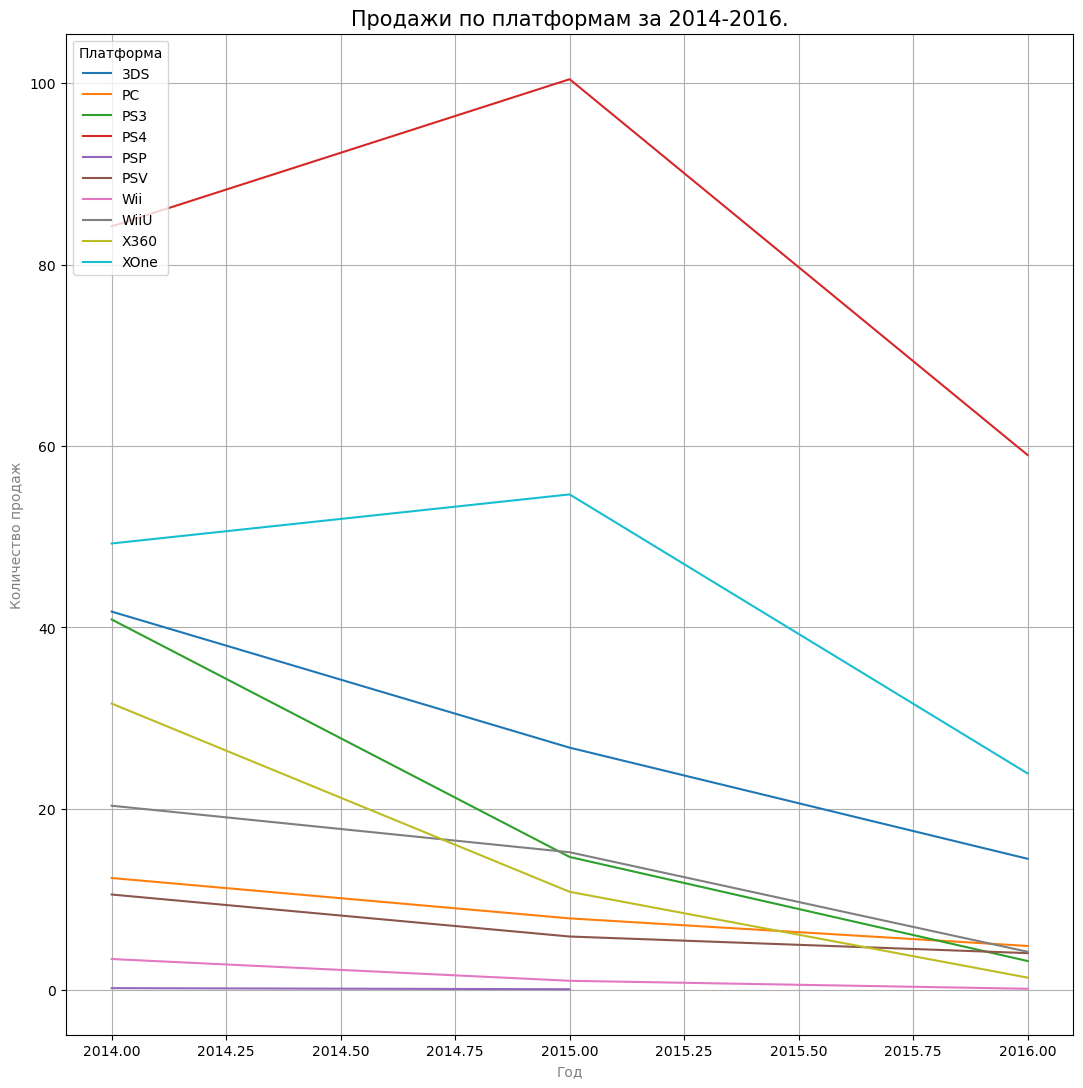

In [26]:
plt.figure(figsize=(13, 13))
plt.title('Продажи по платформам за 2014-2016.', fontsize=15)
plt.grid(True)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество продаж', color='gray')

current_sales_by_platform = pd.pivot_table(current_time,
                                            index=['year_of_release'],
                                            columns=['platform'],
                                            values=['general_sales'],
                                            aggfunc='sum'
                                          )
plt.plot(current_sales_by_platform)
plt.legend(current_sales_by_platform.columns.get_level_values(level=1), loc=2, title='Платформа')

Вывод:

На данный момент самыми актуальными являются PS4 и XOne. Хоть покупаемость игр на эти платформы и падают, в ближайший год они всё также останутся самыми актуальными, они будут самыми прибыльными.

Уже в следующем году скорее всего исчезнет Wii.

PS3, WiiU, X360 идут на спад.

PC платформа стабильна.

PSP уже исчез.

#### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot:title={'center':'general_sales'}, xlabel='platform'>

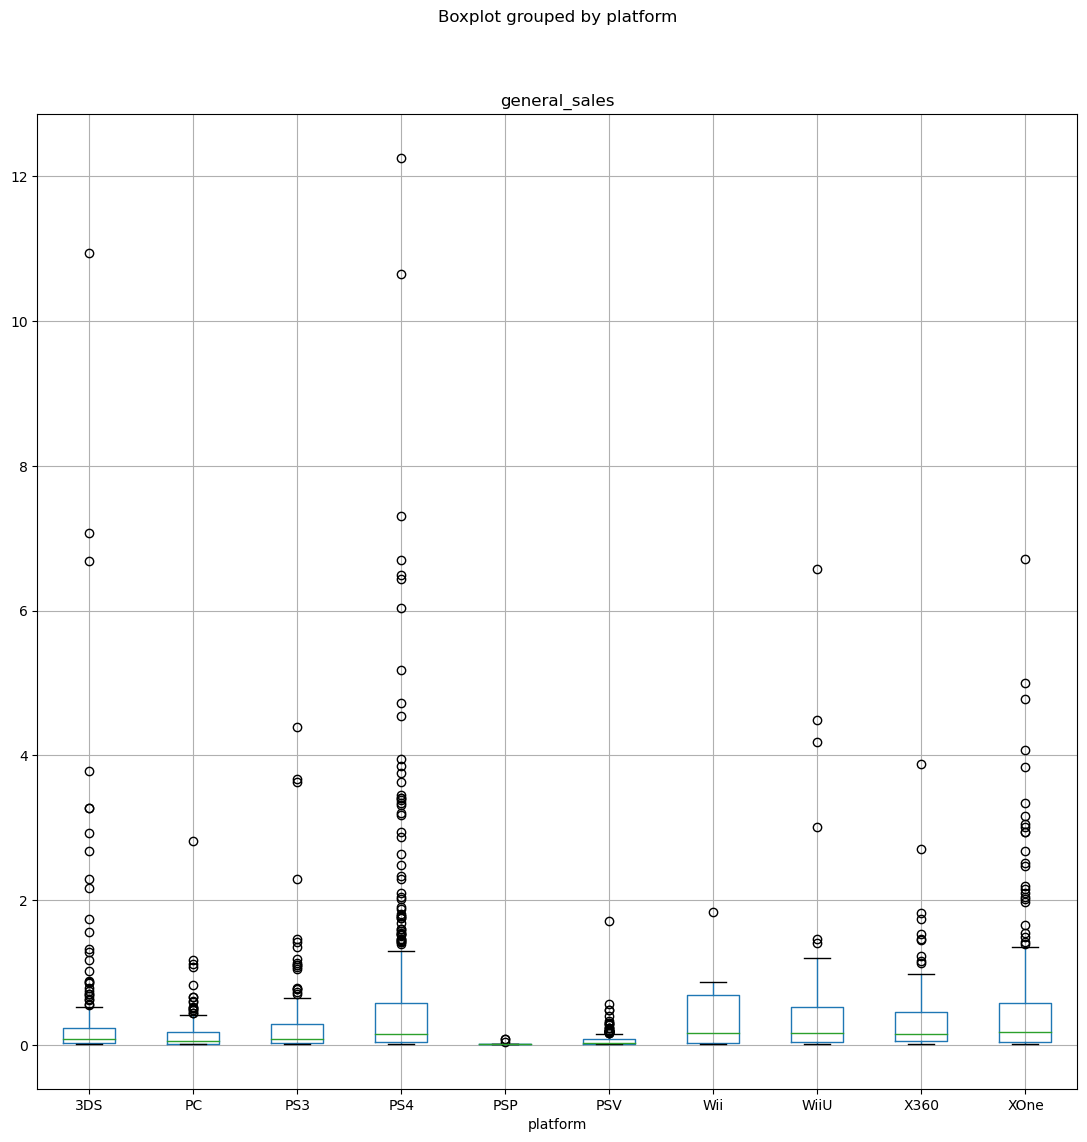

In [27]:
current_time.boxplot(column=['general_sales'], by='platform', grid=True, figsize=(13,13))

Вывод:

Много аномальных значений в данных, сильнее всего выделяется PS4 и 3DS.

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Используем актуальные данные.

Возьмём самую популярную платформу PS4.

In [28]:
ps_four_sales = current_time.query('platform == "PS4"')
ps_four_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,12.25
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,6.70
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,RP,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Text(0, 0.5, 'Продажи')

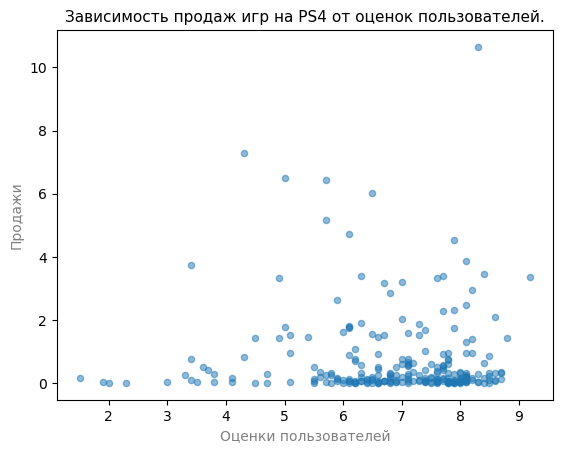

In [29]:
ps_four_sales.plot.scatter (x = 'user_score', y = 'general_sales', alpha=0.5)
plt.title('Зависимость продаж игр на PS4 от оценок пользователей.', fontsize=11)
plt.xlabel('Оценки пользователей', color='gray')
plt.ylabel('Продажи', color='gray')

In [30]:
display(f"Корреляция между продажами на PS4 и отзывами пользователей: {ps_four_sales['general_sales'].corr(ps_four_sales['user_score'])}")

'Корреляция между продажами на PS4 и отзывами пользователей: -0.03936434521328736'

Text(0, 0.5, 'Продажи')

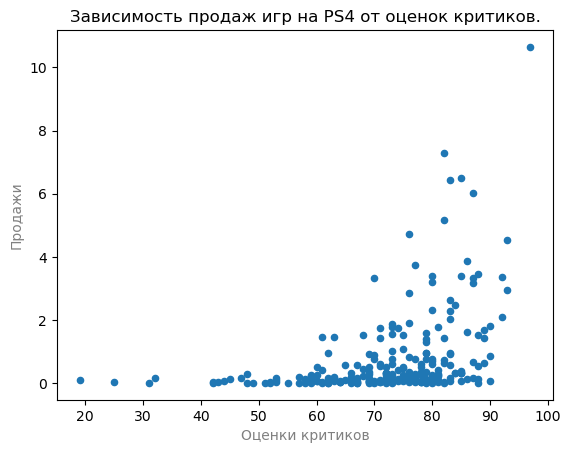

In [31]:
ps_four_sales.plot.scatter (x = 'critic_score', y = 'general_sales')
plt.title('Зависимость продаж игр на PS4 от оценок критиков.', fontsize=12)
plt.xlabel('Оценки критиков', color='gray')
plt.ylabel('Продажи', color='gray')

In [32]:
display(f"Корреляция между продажами на PS4 и отзывами критиков: {ps_four_sales['general_sales'].corr(ps_four_sales['critic_score'])}")

'Корреляция между продажами на PS4 и отзывами критиков: 0.40212034776354344'

Вывод:

Зависимость между продажами на PS4 и отзывами критиков есть, но она не сильная.

Зависимости между продажами на PS4 и отзывами пользователей нет.

#### Продажи игр на других платформах

Используем актуальные данные.

In [33]:
for platform in current_time['platform'].unique():
    platform_sales = current_time.loc[(~(current_time['user_score'].isnull()) & ~(current_time['critic_score'].isnull())) & (current_time['platform'] == platform)]
    display(f"Корреляция между продажами на {platform} и отзывами пользователей: {platform_sales['general_sales'].corr(platform_sales['user_score'])}")
    display(f"Корреляция между продажами на {platform} и отзывами критиков: {platform_sales['general_sales'].corr(platform_sales['critic_score'])}")

'Корреляция между продажами на PS4 и отзывами пользователей: -0.04240859928090059'

'Корреляция между продажами на PS4 и отзывами критиков: 0.4013732207542164'

'Корреляция между продажами на 3DS и отзывами пользователей: 0.2769416920574263'

'Корреляция между продажами на 3DS и отзывами критиков: 0.28261576024605983'

'Корреляция между продажами на XOne и отзывами пользователей: -0.09162862349379007'

'Корреляция между продажами на XOne и отзывами критиков: 0.42210655046106815'

'Корреляция между продажами на WiiU и отзывами пользователей: 0.4111704522059322'

'Корреляция между продажами на WiiU и отзывами критиков: 0.3748030710592288'

'Корреляция между продажами на PS3 и отзывами пользователей: 0.1643587597429239'

'Корреляция между продажами на PS3 и отзывами критиков: 0.45415323092916376'

'Корреляция между продажами на X360 и отзывами пользователей: 0.33568458119973227'

'Корреляция между продажами на X360 и отзывами критиков: 0.5234755924945096'

'Корреляция между продажами на PC и отзывами пользователей: -0.08956079424735801'

'Корреляция между продажами на PC и отзывами критиков: 0.17129930534276644'

'Корреляция между продажами на Wii и отзывами пользователей: nan'

'Корреляция между продажами на Wii и отзывами критиков: nan'

'Корреляция между продажами на PSV и отзывами пользователей: 0.020313387629840963'

'Корреляция между продажами на PSV и отзывами критиков: 0.04951294346723873'

'Корреляция между продажами на PSP и отзывами пользователей: nan'

'Корреляция между продажами на PSP и отзывами критиков: nan'

Вывод:

Зависимость между продажами на X360 и отзывами критиков есть, зависимость между продажами и отзывами пользователей тоже есть, но она не такая сильная. 

Зависимость между продажами на XOne и отзывами критиков есть.

Зависимость между продажами на PS3 и отзывами пользователей есть, зависимость между продажами и отзывами пользователей тоже есть, но она не такая сильная. 

Зависимость между продажами на WiiU и отзывами пользователей не сильная, а также зависимость между продажами на WiiU и отзывами критиков тоже есть, но она слабее послабее.

Wii недостаточно данных.

PSP уже исчез, поэтому его не берём в счёт.

#### Общее распределение игр по жанрам

Используем актуальные данные.

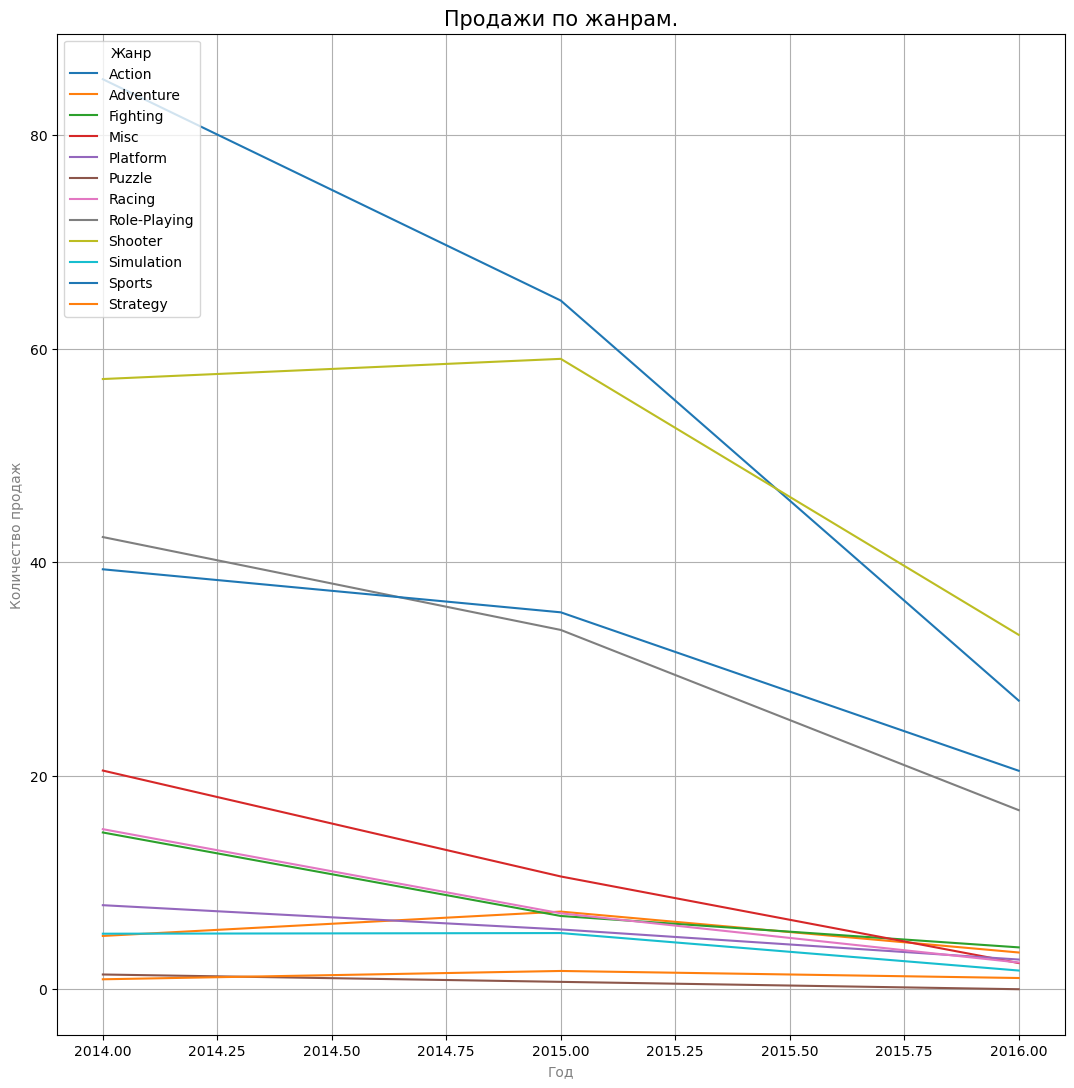

In [34]:
plt.figure(figsize=(13, 13))
plt.title('Продажи по жанрам.', fontsize=15)
plt.grid(True)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество продаж', color='gray')

sales_by_genre = pd.pivot_table(current_time,
                                index=['year_of_release'],
                                columns=['genre'],
                                values=['general_sales'],
                                aggfunc='sum'
                                )


plt.plot(sales_by_genre)
plt.legend(sales_by_genre.columns.get_level_values(level=1), loc=2, title='Жанр')

In [35]:
genre_sales = (current_time.groupby('genre')['general_sales']
               .median().sort_values(ascending=False)
               .head(current_time['genre'].count())
              )
display(genre_sales)

genre
Shooter         0.475
Sports          0.170
Fighting        0.115
Platform        0.115
Role-Playing    0.100
Simulation      0.095
Misc            0.090
Action          0.080
Racing          0.080
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: general_sales, dtype: float64

Вывод:

Самые высокие продажи в жанре: Shooter.

Самые низкие продажи в жанре: Adventure.

### Составить портрет пользователя каждого региона

#### Самые популярные платформы (топ-5) в регионах.

Используем актуальные данные.

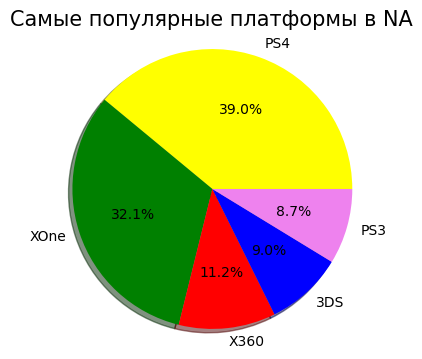

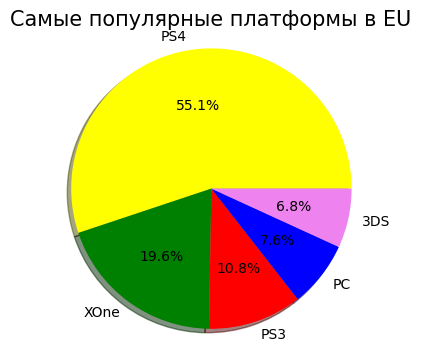

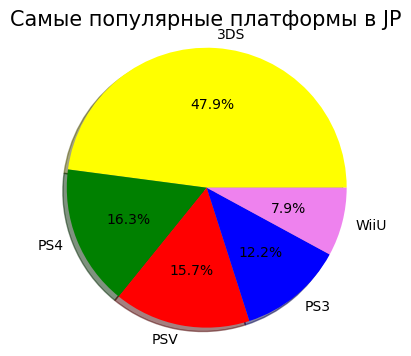

In [36]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    platform_top_five =  pd.pivot_table(current_time,
                                        index=['platform'],
                                        values=[region],
                                        aggfunc='sum'
                                        ).reset_index().sort_values(by=region, ascending=False).head()
    plt.figure(figsize=(4, 4))
    plt.title(f'Самые популярные платформы в {region[:2].upper()}', fontsize=15)
    labels = platform_top_five['platform'].to_list()
    values = platform_top_five[region].to_list()
    colors = ['yellow','green','red','blue', 'violet']
    plt.pie(values,labels=labels,colors=colors, shadow=True, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

Вывод:

1)Ситуация с платформами в NA(Северная Америка):

1.1)Самая популярная платформа - PS4 - 39.0%

1.2)Самая непопулярная платформа - PS3 - 8.7%

1.3)Второе место занимает XOne - 32.1%, остальную часть делят между собой X360 - 11.2%, 3DS - 9.0%

2)Ситуация с платформами в EU(Европа):

2.1)Самая популярная платформа - PS4 - 55.1%

2.2)Самая непопулярная платформа - 3DS - 6.8%

2.3)В Европе в топ 5 не входит 360, но есть PC, которого нет в Северной Америке

2.4)В Европе XOne занимает только 19.6%, что намного меньше чем в Северной Америке, остальную часть делят между собой PS3 - 10.8%, PC - 9.0%.

3)Ситуация с платформами в JP(Япония):

3.1)Самая популярная платформа - 3DS - 47.9%

3.2)Самая непопулярная платформа - WiiU - 7.9%

3.3)В Японии есть две платформы, которых нет в Северной Америке и в Европе, это PSV и WiiU.

3.4)Второе место занимает PS4 - 16.3%, но отрыв от PSV небольшой - 15,7%. PS3 занимает 12.2.

4)Самой популярной платформой является PS4, в двух регионах она занимает первое место, в третьем второе место. Также в каждом регионе в топ 5 входит PS3. XOne не востребован в Японии, хотя в других двух регионах занимает второе место.

#### Самые популярные жанры (топ-5) в регионах

Используем актуальные данные.

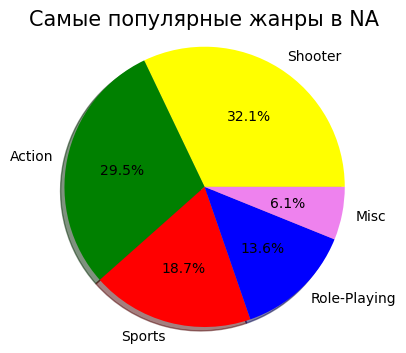

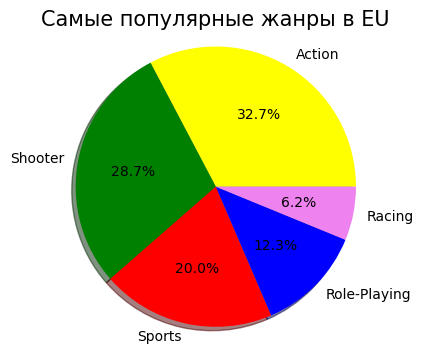

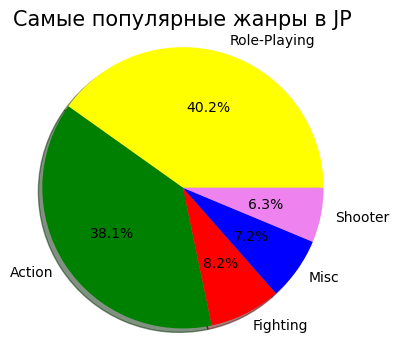

In [37]:

for region in regions:
    genre_top_five =  pd.pivot_table(current_time,
                                        index=['genre'],
                                        values=[region],
                                        aggfunc='sum'
                                        ).reset_index().sort_values(by=region, ascending=False).head()
    plt.figure(figsize=(4, 4))
    plt.title(f'Самые популярные жанры в {region[:2].upper()}', fontsize=15)
    labels = genre_top_five['genre'].to_list()
    values = genre_top_five[region].to_list()
    colors = ['yellow','green','red','blue', 'violet']
    plt.pie(values,labels=labels,colors=colors, shadow=True, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

Вывод:

1)Ситуация с жанрами в NA(Северная Америка):

1.1)Самый популярный жанр - Shooter - 32.1%

1.2)Самый непопулярный жанр - Misc - 6.1%

1.3)Второе место занимает с небольшим отставанием Action - 29.5%, остальную часть делят между собой Sports - 18.7%, Role-Playing - 13.6%

2)Ситуация с жанрами в EU(Европа):

2.1)Самый популярный жанр - Action - 55.1%

2.2)Самый непопулярный жанр - Racing - 6.2%

2.3)В Европе в топ 5 не входит жанр Misk, но есть Racing, которого нет в Северной Америке и в Японии.

2.4)В Европе второе занимает уже с небольшим оставанием Shooter - 28.7, что немного меньше чем в Северной Америке, остальную часть делят между собой Sports - 20.0% - этот жанр больше места занимает в Европе нежели в Северной Америке, а Role-Playing уже менее популярнее чем в Северной Америке Role-Playing - 12.3%.

3)Ситуация с жанрами в JP(Япония):

3.1)Самый популярный жанр - Role-Playing - 40.2%

3.2)Самый непопулярный жанр - Shooter - 6.3%

3.3)В Японии есть жанр в топ 5, которого нет в Северной Америке и Европе - Fighting.

3.4)Второе место занимает Action - 38.1%, не сильное оставание от первого места, Fighting - 8.2% и Misk - 7.2%.

4)Самым популярным жанром является Action, во всех регионах он входит в топ 2. Shooter и Role-Playing в топе каждого региона.

#### Влияние ESRB на продажи в отдельном регионе

Используем актуальные данные.

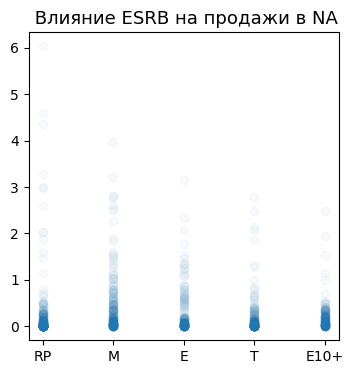

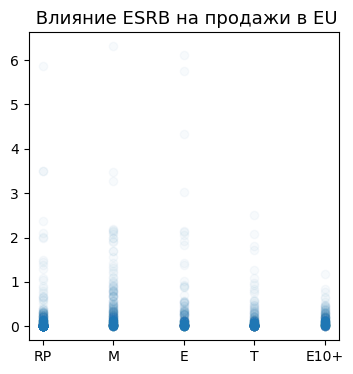

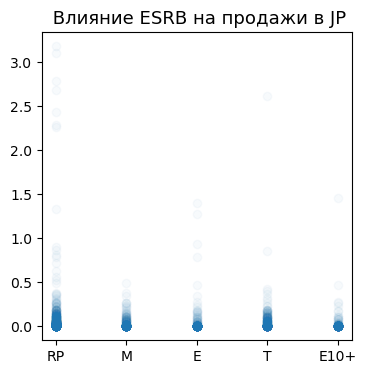

In [38]:
for region in regions:
    plt.figure(figsize=(4, 4))
    plt.title(f' Влияние ESRB на продажи в {region[:2].upper()}', fontsize=13)
    plt.plot(current_time['rating'], current_time[region], 'o', alpha=0.03)
    plt.show()
    


Вывод:

В Северной Америке лучше продаются игры с рейтингами М, влияение ESRB есть.

В Европе лучше продаются игры с рейтингами М, влияение ESRB есть. 

В Японии все игры на более менее одном уровне, выделяется только RP, влияение есть, но не сильное.

По данным видим, что игроки охотнее покупают игры с рейтингом M.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Будем использовать актуальные данные.

Алгоритм проверки статистических гипотез всегда начинается с
формулирования гипотез.

Напишем нулевую и альтернативную гипотезу.

Нулевая гипотеза. H_0 - Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

Альтернативная гипотеза. H_1 - Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Пороговое значение alpha приравниваем к 5%.

In [39]:
xbox_one = current_time.loc[~(current_time['user_score'].isnull()) & (current_time['platform'] == 'XOne'), 'user_score']
pc = current_time.loc[~(current_time['user_score'].isnull()) & (current_time['platform'] == 'PC'), 'user_score']

In [40]:
alpha = .05

results = st.ttest_ind(xbox_one, pc)

print('p-значение: ', results.pvalue)


p-значение:  0.10450507919348415


In [41]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод:

Нулевую гипотезу не удалось отвергнуть, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Будем использовать актуальные данные.

Алгоритм проверки статистических гипотез всегда начинается с
формулирования гипотез.

Напишем нулевую и альтернативную гипотезу.

Нулевая гипотеза. H_0 - Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза. H_1 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Пороговое значение alpha приравниваем к 5%.

In [42]:
action = current_time.loc[~(current_time['user_score'].isnull()) & (current_time['genre'] == 'Action'), 'user_score']
sports = current_time.loc[~(current_time['user_score'].isnull()) & (current_time['genre'] == 'Sports'), 'user_score']


In [43]:
alpha = .05

results = st.ttest_ind(action, sports)

print('p-значение: ', results.pvalue)

p-значение:  2.8711147985105864e-19


In [44]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Вывод:

Нулевую гипотезу  удалось отвергнуть, средние пользовательские рейтинги платформ Xbox One и PC разные.

### Общий вывод.

1)Была проделана работа с данными:

1.1)Изменение в названиях столбцов.

Поменяли регистр на нижний во всех названиях столбцов.

1.2)Найдены пропущенные значения в столбцах:

critic_score - поменяли тип данных с float на int.

user_score - изначально тип был object, в столбце было значение 'tbd', расшифровка 'ещё не определено', заменили на nan и поменяли тип на float.

year_of_release - изначально тип был float, изменили на int.

1.3)Заполнили пропуски в столбцах.

name - качественная переменная, всего 2 пропуска, удалим их. Такое количество удаленных строк не сильно повлият на наши данные, а заполнить без ущерба для данных мы никак не можем.

year_of_release = количественная переменная, всего 269 пропуска. Заполнить средним значением и медианной его не получится, поэтому лучше удалим эти строки.

genre - качественная переменная, всего 2 пропуска, удалим их. Такое количество удаленных строк не сильно повлият на наши данные, а заполнить без ущерба для данных мы никак не можем.

critic_score - количественная переменная. Доля пропущенных значений составляет 51.3%, что является большим количеством, поэтому никак заполнить адекватно мы не сможем эти пропуски и удалить тоже нельзя. Поэтому оставим как есть.

user_score - количественная переменная. Доля пропущенных значений составляет 54.6%, что является большим количеством, поэтому никак заполнить адекватно мы не сможем эти пропуски и удалить тоже нельзя. Поэтому оставим как есть.

rating - качественная переменная, заполним данные пропуски значением RP, означающее, что игре всё ещё не выставили оценку.

1.4)Добавлен новый столбец.

В данные добавлен новый столбец general_sales с общими продажами каждой игры.

2)Исследовали данные:

2.1)Cколько игр выпускалось в разные годы.

Рост выпускаемых игр с 1990 по 2007, пик был 2007-2009, позже их стали выпускать с каждым годом все меньше. 

2.2)Как менялись продажи по платформам.

Особой популярностью обладает линейка PS, на их новые платформы бывают очень большие продажи игр.

В среднем на пике платформы держатся 5 лет.

Примерно через 5 лет появляются новые платформы.

Платформа в среднем исчезает через 10 лет.

Примечание: Дальше мы используем актуальный период последние 3 года.

2.3)Платформы лидирующие по продажам, растущие или падающие.

На данный момент самыми актуальными являются PS4 и XOne. Хоть покупаемость игр на эти платформы и падают, в ближайший год они всё также останутся самыми актуальными, они будут самыми прибыльными.

Уже в следующем году скорее всего исчезнет Wii.

PS3, WiiU, X360 идут на спад.

PC платформа стабильна.

2.4)Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Взяли за популярную платформу PS4.

Зависимость между продажами на PS4 и отзывами критиков есть, но она не сильная.

Зависимости между продажами на PS4 и отзывами пользователей нет.

2.5)Соотношение выводов о PS4 с продажами игр на других платформах

Зависимость между продажами на XOne и отзывами критиков сильнее чем на PS4.

Зависимость между продажами на WiiU и отзывами пользователей, а также зависимость между продажами на WiiU и отзывами критиков сильнее чем на PS4.

В остальных случаях зависимость PS4 сильнее. Также остальные платформы очень мало зависят от отзывов.

PSP уже исчез, поэтому его не берём в счёт.

3)Составление портрета пользователей каждого региона.



3.1)Самые популярные платформы (топ-5).

1)Ситуация с платформами в NA(Северная Америка):

Самая популярная платформа - PS4 - 39.0%

Самая непопулярная платформа - PS3 - 8.7%

Второе место занимает XOne - 32.1%, остальную часть делят между собой X360 - 11.2%, 3DS - 9.0%

2)Ситуация с платформами в EU(Европа):

Самая популярная платформа - PS4 - 55.1%

Самая непопулярная платформа - 3DS - 6.8%

В Европе в топ 5 не входит 360, но есть PC, которого нет в Северной Америке

В Европе XOne занимает только 19.6%, что намного меньше чем в Северной Америке, остальную часть делят между собой PS3 - 10.8%, PC - 9.0%.

3)Ситуация с платформами в JP(Япония):

Самая популярная платформа - 3DS - 47.9%

Самая непопулярная платформа - WiiU - 7.9%

В Японии есть две платформы, которых нет в Северной Америке и в Европе, это PSV и WiiU.

Второе место занимает PS4 - 16.3%, но отрыв от PSV небольшой - 15,7%. PS3 занимает 12.2.

4)Самой популярной платформой является PS4, в двух регионах она занимает первое место, в третьем второе место. Также в каждом регионе в топ 5 входит PS3. XOne не востребован в Японии, хотя в других двух регионах занимает второе место.



3.2)Самые популярные жанры (топ-5). 

1)Ситуация с жанрами в NA(Северная Америка):

Самый популярный жанр - Shooter - 32.1%

Самый непопулярный жанр - Misc - 6.1%

Второе место занимает с небольшим отставанием Action - 29.5%, остальную часть делят между собой Sports - 18.7%, Role-Playing - 13.6%

2)Ситуация с жанрами в EU(Европа):

Самый популярный жанр - Action - 55.1%

Самый непопулярный жанр - Racing - 6.2%

В Европе в топ 5 не входит жанр Misk, но есть Racing, которого нет в Северной Америке и в Японии.

В Европе второе занимает уже с небольшим оставанием Shooter - 28.7, что немного меньше чем в Северной Америке, остальную часть делят между собой Sports - 20.0% - этот жанр больше места занимает в Европе нежели в Северной Америке, а Role-Playing уже менее популярнее чем в Северной Америке Role-Playing - 12.3%.

3)Ситуация с жанрами в JP(Япония):

Самый популярный жанр - Role-Playing - 40.2%

Самый непопулярный жанр - Shooter - 6.3%

В Японии есть жанр в топ 5, которого нет в Северной Америке и Европе - Fighting.

Второе место занимает Action - 38.1%, не сильное оставание от первого места, Fighting - 8.2% и Misk - 7.2%.

4)Самым популярным жанром является Action, во всех регионах он входит в топ 2. Shooter и Role-Playing в топе каждого региона.

3.3)Влияние рейтинга ESRB на продажи в отдельном регионе.

В Северной Америке лучше продаются игры с рейтингами М, влияение ESRB есть.

В Европе лучше продаются игры с рейтингами М, влияение ESRB есть.

В Японии все игры на более менее одном уровне, выделяется только RP, влияение есть, но не сильное.

По данным видим, что игроки охотнее покупают игры с рейтингом M.

4)Проверка гипотез.

4.1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза. H_0 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза. H_1 - Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Нулевая гипотезу не удалось отвергнуть, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

4.2)Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза. H_0 - Средний пользовательский рейтинг жанра Action  равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза. H_1 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Нулевая гипотезу удалось отвергнуть, средние пользовательские рейтинги платформ Sports и Action разные.



**Подведём окончательный итог, на какие игры тратить рекламный бюджет.**

Платформа игры: PS4. PS4 очень популярен во всём мире.

Жанр игры: Shooter или Action. Они являются самыми популярными жанрами по продажам.

Рейтинг игры ESRB: М.

Регионы для рекламы: EU и NA.



